In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

In [89]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [90]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [91]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]

In [92]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [93]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [94]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

<Axes: >

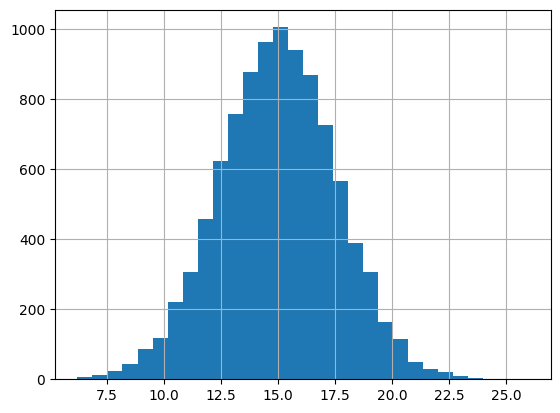

In [95]:
df['fuel_efficiency_mpg'].hist(bins=30)

In [96]:
df['fuel_efficiency_mpg'].skew()

np.float64(-0.012062219273507922)

In [97]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [98]:
df['horsepower'].median()

np.float64(149.0)

In [99]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [100]:
idx = np.arange(n)

In [101]:
np.random.seed(42)
np.random.shuffle(idx)

In [102]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [103]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [104]:
df_train0 = df_train.copy()
df_val0 = df_val.copy()
df_train0['horsepower'] = df_train0['horsepower'].fillna(0)
df_val0['horsepower'] = df_val0['horsepower'].fillna(0)

In [105]:
model0 = LinearRegression()
model0.fit(df_train0.drop(columns=['fuel_efficiency_mpg']), df_train0['fuel_efficiency_mpg'])
val_pred0 = model0.predict(df_val0.drop(columns=['fuel_efficiency_mpg']))
rmse0 = np.sqrt(mean_squared_error(df_val0['fuel_efficiency_mpg'], val_pred0))
print("RMSE with 0:", round(rmse0, 2))

RMSE with 0: 0.52


In [106]:
mean_hp = df_train['horsepower'].mean()
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(mean_hp)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(mean_hp)

In [107]:
model_mean = LinearRegression()
model_mean.fit(df_train_mean.drop(columns=['fuel_efficiency_mpg']), df_train_mean['fuel_efficiency_mpg'])
val_pred_mean = model_mean.predict(df_val_mean.drop(columns=['fuel_efficiency_mpg']))
rmse_mean = np.sqrt(mean_squared_error(df_val_mean['fuel_efficiency_mpg'], val_pred_mean))
print("RMSE with mean:", round(rmse_mean, 2))

RMSE with mean: 0.46


In [108]:
df_train_ridge = df_train.copy()
df_val_ridge = df_val.copy()
df_train_ridge["horsepower"] = df_train_ridge["horsepower"].fillna(0)
df_val_ridge["horsepower"] = df_val_ridge["horsepower"].fillna(0)

In [109]:
X_train = df_train_ridge.drop(columns=["fuel_efficiency_mpg"])
y_train = df_train_ridge["fuel_efficiency_mpg"]
X_val = df_val_ridge.drop(columns=["fuel_efficiency_mpg"])
y_val = df_val_ridge["fuel_efficiency_mpg"]

In [110]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_results = []
for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    rmse_rounded = round(rmse, 2)
    print("r =", r, "| RMSE =", rmse_rounded)
    rmse_results.append(rmse_rounded)

r = 0 | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1 | RMSE = 0.52
r = 1 | RMSE = 0.52
r = 5 | RMSE = 0.52
r = 10 | RMSE = 0.52
r = 100 | RMSE = 0.52


In [111]:
best_rmse = min(rmse_results)
best_r_indices = [i for i, val in enumerate(rmse_results) if val == best_rmse]
best_r = r_values[best_r_indices[0]]
print("Best r:", best_r, "| Best RMSE:", best_rmse)

Best r: 0 | Best RMSE: 0.52


In [112]:
rmse_scores = []

In [113]:
for seed in range(10):
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].copy()
    df_test = df.iloc[idx[n_train+n_val:]].copy() 

In [114]:
df_train['horsepower'] = df_train['horsepower'].fillna(0)
df_val['horsepower'] = df_val['horsepower'].fillna(0)

In [115]:
model = LinearRegression()
model.fit(df_train.drop(columns=['fuel_efficiency_mpg']), df_train['fuel_efficiency_mpg'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
val_preds = model.predict(df_val.drop(columns=['fuel_efficiency_mpg']))
rmse = np.sqrt(mean_squared_error(df_val['fuel_efficiency_mpg'], val_preds))
rmse_scores.append(rmse)

In [118]:
std = np.std(rmse_scores)

In [119]:
print("Standard deviation of RMSE scores (rounded to 3 decimals):", round(std, 3))

Standard deviation of RMSE scores (rounded to 3 decimals): 0.0


In [120]:
print("All RMSE scores for each seed:", rmse_scores)

All RMSE scores for each seed: [np.float64(0.5131865908331017), np.float64(0.5131865908331017)]


In [121]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[idx[n_train:n_train + n_val]].copy()
df_test = df.iloc[idx[n_train + n_val:]].copy()

In [122]:
df_full_train = pd.concat([df_train, df_val]).copy()

In [123]:
df_full_train["horsepower"] = df_full_train["horsepower"].fillna(0)
df_test["horsepower"] = df_test["horsepower"].fillna(0)

In [124]:
ridge = Ridge(alpha=0.001)
ridge.fit(df_full_train.drop(columns=["fuel_efficiency_mpg"]), df_full_train["fuel_efficiency_mpg"])

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [125]:
y_pred = ridge.predict(df_test.drop(columns=["fuel_efficiency_mpg"]))
rmse_test = np.sqrt(mean_squared_error(df_test["fuel_efficiency_mpg"], y_pred))
print("Test RMSE:", round(rmse_test, 3))

Test RMSE: 0.516
